สอน Machine Learning: การเปรียบเทียบความแม่นยำของ Classifier models หลาย ๆ ตัวพร้อม ๆ กัน
===

## Classification model comparison (Iris dataset)

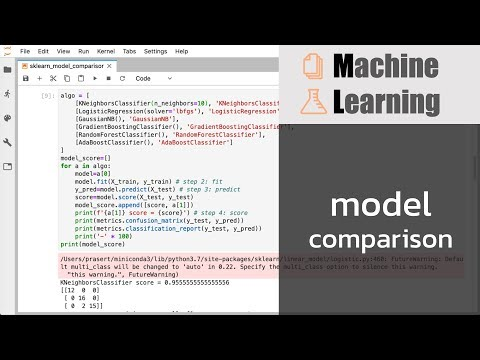

In [2]:
from IPython.display import Audio,Image, YouTubeVideo
id='DeKMoxpI7DM'
YouTubeVideo(id=id,width=600,height=300)

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)

In [3]:
import pandas as pd

In [4]:
print(f'pandas  version = {pd.__version__}')

pandas  version = 1.1.3


In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,virginica
20,5.4,3.4,1.7,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
38,4.4,3.0,1.3,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [7]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [8]:
model=KNeighborsClassifier() # step 1: choose model/estimator
# model=LogisticRegression()
model.fit(X_train, y_train) # step 2: fit
y_pred=model.predict(X_test) # step 3: predict
model.score(X_test, y_test) # step 4: score

0.9111111111111111

In [9]:
# model=KNeighborsClassifier() # step 1: choose model/estimator
model=LogisticRegression()
model.fit(X_train, y_train) # step 2: fit
y_pred=model.predict(X_test) # step 3: predict
model.score(X_test, y_test) # step 4: score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9111111111111111

In [10]:
# model=KNeighborsClassifier() # step 1: choose model/estimator
model=GaussianNB()
model.fit(X_train, y_train) # step 2: fit
y_pred=model.predict(X_test) # step 3: predict
model.score(X_test, y_test) # step 4: score

0.8888888888888888

In [11]:
algo = [
    [KNeighborsClassifier(n_neighbors=10), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GaussianNB(), 'GaussianNB'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier']
]
model_score=[]
for a in algo:
    model=a[0]
    model.fit(X_train, y_train) # step 2: fit
    y_pred=model.predict(X_test) # step 3: predict
    score=model.score(X_test, y_test)
    model_score.append([score, a[1]])
    print(f'{a[1]} score = {score}') # step 4: score
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)
print(model_score)

KNeighborsClassifier score = 0.9555555555555556
[[12  0  0]
 [ 0 16  0]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94        16
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

----------------------------------------------------------------------------------------------------
LogisticRegression score = 0.9111111111111111
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88        16
   virginica       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier score = 0.8888888888888888
[[12  0  0]
 [ 0 12  4]
 [ 0  1 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.75      0.83        16
   virginica       0.80      0.94      0.86        17

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45

----------------------------------------------------------------------------------------------------
RandomForestClassifier score = 0.9111111111111111
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88        16
   virginica       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg  

In [12]:
dscore=pd.DataFrame(model_score, columns=['score', 'classifier'])
dscore

,score,classifier
0,0.955556,KNeighborsClassifier
1,0.911111,LogisticRegression
2,0.888889,GaussianNB
3,0.888889,GradientBoostingClassifier
4,0.911111,RandomForestClassifier
5,0.866667,AdaBoostClassifier


In [13]:
dscore.sort_values('score', ascending=False)

,score,classifier
0,0.955556,KNeighborsClassifier
1,0.911111,LogisticRegression
4,0.911111,RandomForestClassifier
2,0.888889,GaussianNB
3,0.888889,GradientBoostingClassifier
5,0.866667,AdaBoostClassifier
